## LINEAR REGRESSION 
### Boston Dataset

In [1]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline



In [3]:


#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error



## Data Exploration

In [4]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()

In [5]:
print(type(boston))
print('\n')
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#Converting data from nd-array to dataframe and adding feature names to the data(bos)

bos = pd.DataFrame(boston.data, columns = boston.feature_names)
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [11]:
print(boston.target.shape)
bos['PRICE'] = boston.target
print(bos.head())

(506,)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  



### Data preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()


In [13]:
bos.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. Here, we will use visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable $ Price $. We will use the distplot function from the seaborn library.


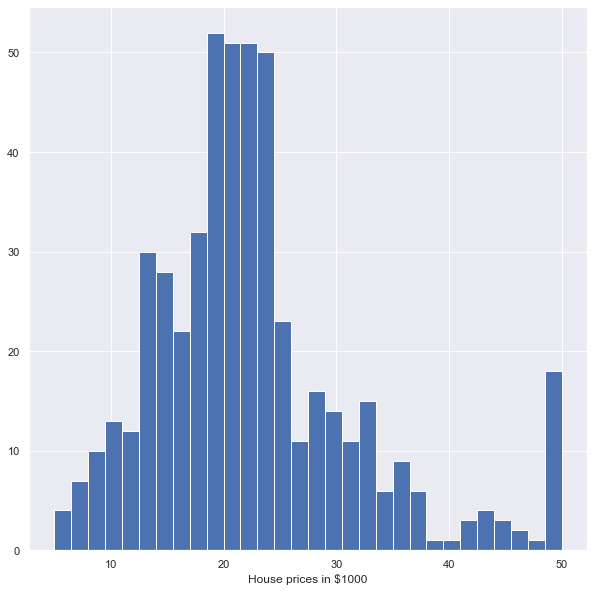

In [39]:
sns.set(rc={'figure.figsize':(10,10)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()                 

We can see from the plot that the values of PRICE are distributed normally with few outliers. Most of the house are around 20-24 range (in $1000 scale)

Now, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matri

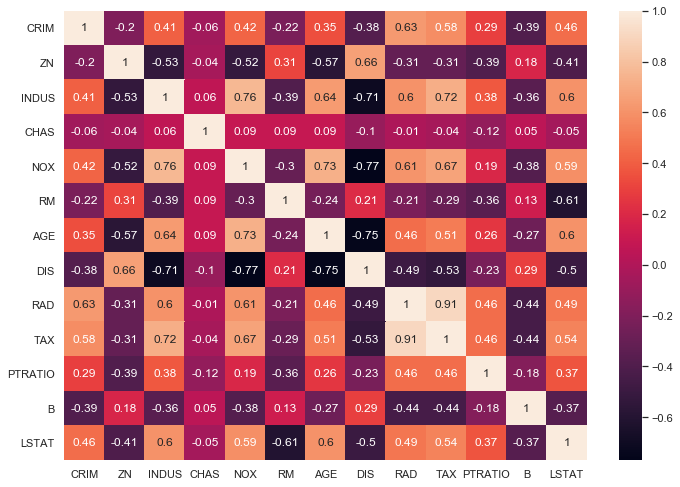

In [17]:

#Created a dataframe without the price col, since we need to see the correlation between the variables
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)




The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.
Notice

    By looking at the correlation matrix we can see that RM has a strong positive correlation with PRICE (0.7) where as LSTAT has a high negative correlation with PRICE (-0.74).
    An important point in selecting features for a linear regression model is to check for multicolinearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

But for now we will keep all the features.


Splitting the data into training and testing sets

SInce we need to test our model, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data.

 To split the data we use train_test_split function provided by scikit-learn library. We finally print the shapes of our training and test set to verify if the splitting has occurred properly

## Prepare Data for Linear Regression

In [23]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [24]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [25]:
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [28]:
reg_all = LinearRegression()
reg_all.fit(X_train_1, Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# model evaluation for training set

y_train_predict = reg_all.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict)))
r2 = round(reg_all.score(X_train_1, Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516
R2 score is 0.74




In [31]:
# model evaluation for test set

y_pred = reg_all.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred)))
r2 = round(reg_all.score(X_test_1, Y_test_1),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.568292042303175
R^2: 0.73




In [32]:
%timeit cvresults_3 = cross_val_score(reg_all, X, y, cv = 3)

20.9 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Ridge accuracy

In [33]:
from sklearn.linear_model import Ridge, Lasso



ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train_1,Y_train_1)
ridge_pred = ridge.predict(X_test_1)
ridge.score(X_test_1, Y_test_1)



0.7487357858579864

## Lasso accuracy


In [34]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train_1,Y_train_1)
lasso_pred = lasso.predict(X_test_1)
lasso.score(X_test_1, Y_test_1)

0.645203567438633